<a href="https://colab.research.google.com/github/Monica-Restrepo/clases-programacion/blob/main/visualizacion_datos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Ploty

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/inmigrantes_canada.csv')
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df.shape

(195, 38)

In [ ]:
df.info()

# nno tenemos que tratar los datos, porque no hay regsitros nulos y las variables tienen el tipo adecuado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [ ]:
# nos vamos a enfocar en la tendencia de inmigrantes colombianos a cadana
# modificamos el indice para que se llame pais

df.set_index('Pais', inplace=True)
df.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
# hacemos un filtro para separar los años

anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
# ahora creamos una variable colombia y con loc nos ayuda a encontrar colombia dentro de la variable anos

colombia = df.loc['Colombia', anos]
colombia

# muestra los años y la cantidad de inmigrantes por año

,Colombia
1980,266
1981,326
1982,360
1983,244
1984,235
1985,214
1986,257
1987,376
1988,352
1989,439


In [ ]:
# hay que crear un dataframe con esta información, pero primero vamos a crear un dicicionario

col_dict = {'Año':colombia.index.tolist(),
            'Inmigrantes':colombia.values.tolist()}
col_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(266),
  np.int64(326),
  np.int64(360),
  np.int64(244),
  np.int64(235),
  np.int64(214),
  np.int64(257),
  np.int64(376),
  np.int64(352),
  np.int64(439),
  np.int64(614),
  np.int64(652),
  np.int64(582),
  np.int64(464),
  np.int64(375),
  np.int64(371),
  np.int64(381),
  np.int64(578),
  np.int64(929),
  np.int64(1306),
  np.int64(2259),
  np.int64(2965),
  np.int64(3283),
  np.int64(4318),
  np.int64(4566),
  np.int64(6424),
  np.int64(6535),
  np.int64(5357),
  np.int64(5452),
  np.int64(4652),
  np.int64(5218),
  np.int64(4366),
  np.int64(3741),
  np.int64(3631)]}

In [ ]:
# Ahora si creamos el dataframe

datos_col = pd.DataFrame(col_dict)
datos_col.tail()

,Año,Inmigrantes
29,2009,4652
30,2010,5218
31,2011,4366
32,2012,3741
33,2013,3631


## Matplotlib

In [ ]:
import matplotlib.pyplot as plt

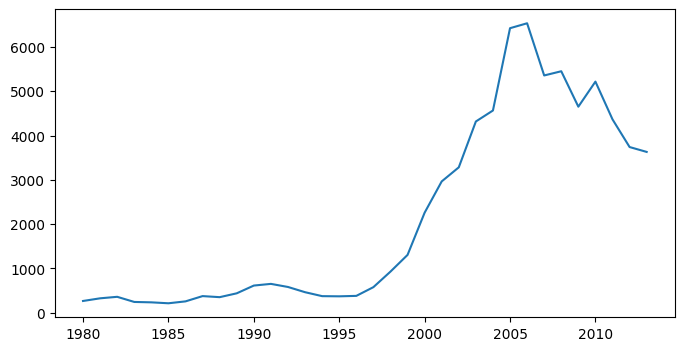

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.show()

# plot = grafico de linea

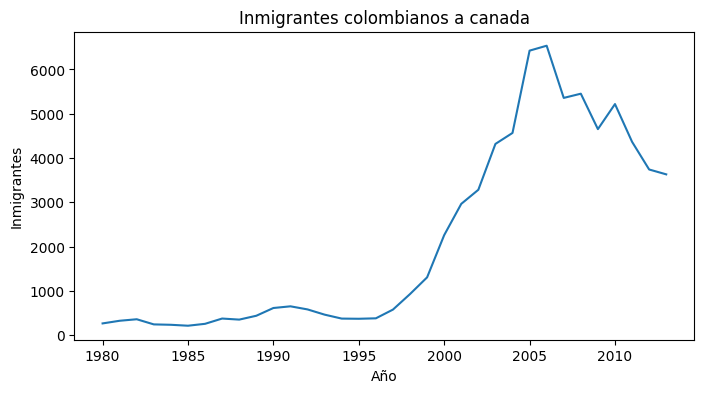

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes colombianos a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.show()

In [ ]:
argentina = df.loc['Argentina', anos]
argentina

,Argentina
1980,368
1981,426
1982,626
1983,241
1984,237
1985,196
1986,213
1987,519
1988,374
1989,538


In [ ]:
arg_dict = {'Año':argentina.index.tolist(),
            'Inmigrantes':argentina.values.tolist()}
arg_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(368),
  np.int64(426),
  np.int64(626),
  np.int64(241),
  np.int64(237),
  np.int64(196),
  np.int64(213),
  np.int64(519),
  np.int64(374),
  np.int64(538),
  np.int64(678),
  np.int64(763),
  np.int64(1023),
  np.int64(1022),
  np.int64(366),
  np.int64(380),
  np.int64(396),
  np.int64(391),
  np.int64(349),
  np.int64(318),
  np.int64(427),
  np.int64(635),
  np.int64(865),
  np.int64(1745),
  np.int64(1591),
  np.int64(1153),
  np.int64(847),
  np.int64(620),
  np.int64(540),
  np.int64(467),
  np.int64(459),
  np.int64(278),
  np.int64(263),
  np.int64(282)]}

In [ ]:
datos_arg = pd.DataFrame(arg_dict)
datos_arg.tail()

,Año,Inmigrantes
29,2009,467
30,2010,459
31,2011,278
32,2012,263
33,2013,282


In [ ]:
brasil = df.loc['Brasil', anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


In [ ]:
bra_dict = {'Año':brasil.index.tolist(),
            'Inmigrantes':brasil.values.tolist()}
bra_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(211),
  np.int64(220),
  np.int64(192),
  np.int64(139),
  np.int64(145),
  np.int64(130),
  np.int64(205),
  np.int64(244),
  np.int64(394),
  np.int64(650),
  np.int64(650),
  np.int64(877),
  np.int64(1066),
  np.int64(866),
  np.int64(566),
  np.int64(572),
  np.int64(586),
  np.int64(591),
  np.int64(531),
  np.int64(626),
  np.int64(845),
  np.int64(847),
  np.int64(745),
  np.int64(839),
  np.int64(917),
  np.int64(969),
  np.int64(1181),
  np.int64(1746),
  np.int64(2138),
  np.int64(2509),
  np.int64(2598),
  np.int64(1508),
  np.int64(1642),
  np.int64(1714)]}

In [ ]:
datos_bra = pd.DataFrame(bra_dict)
datos_bra.tail()

,Año,Inmigrantes
29,2009,2509
30,2010,2598
31,2011,1508
32,2012,1642
33,2013,1714


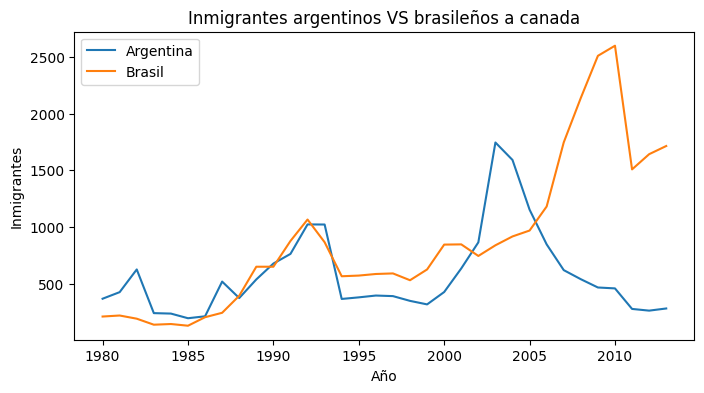

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(datos_arg['Año'], datos_arg['Inmigrantes'], label='Argentina')
plt.plot(datos_bra['Año'], datos_bra['Inmigrantes'], label='Brasil')
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes argentinos VS brasileños a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.legend()
plt.show()

In [ ]:
# otra forma de hacerlo

df_comparacion = df.loc[['Brasil', 'Argentina'], anos]

In [ ]:
# para transponer el dataframe

df_comparacion = df_comparacion.T
df_comparacion.head()

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


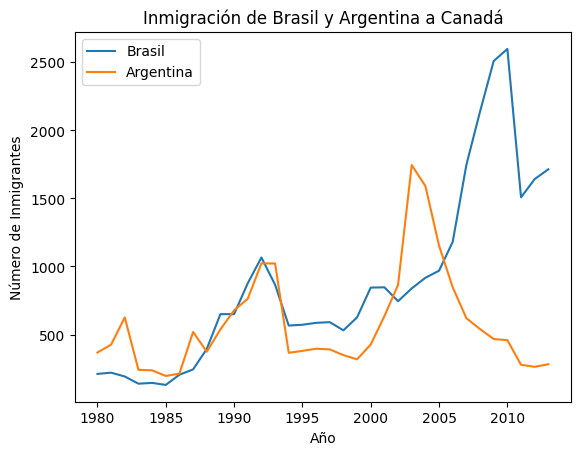

In [ ]:
plt.plot(df_comparacion['Brasil'], label='Brasil')
plt.plot(df_comparacion['Argentina'], label='Argentina')
plt.title('Inmigración de Brasil y Argentina a Canadá')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()

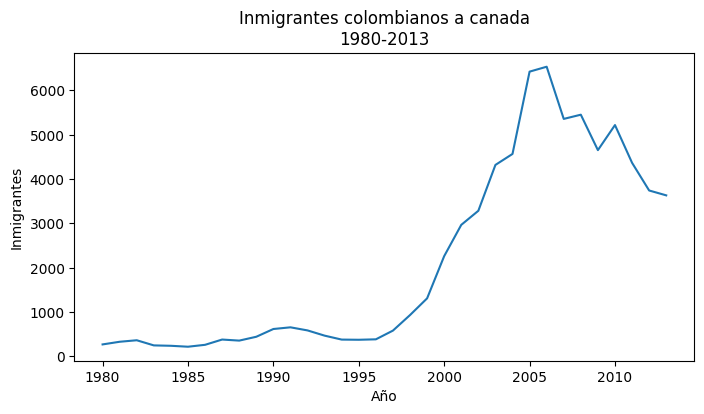

In [ ]:
# para mejorar los graficos es necesario guardarlos en una variable fig=lienzo, ax=figura

fif, ax= plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'])
# con esta función me separa las fechas de 5 en 5
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigrantes colombianos a canada\n1980-2013')
ax.set_xlabel('Año')
ax.set_ylabel('Inmigrantes')
plt.show()

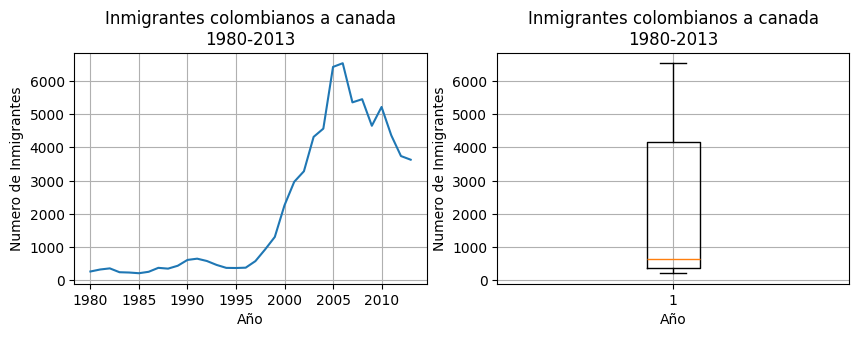

In [ ]:
# hacer un gráfico de cajas para ver estadistica descriptiva
# Hacer un gráfico con dos subgráficos:

fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].plot(datos_col['Año'], datos_col['Inmigrantes'])
axs[0].set_title('Inmigrantes colombianos a canada\n1980-2013')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Numero de Inmigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(datos_col['Inmigrantes'])
axs[1].set_title('Inmigrantes colombianos a canada\n1980-2013')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Numero de Inmigrantes')
axs[1].grid()

In [ ]:
datos_col.describe()

,Inmigrantes
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


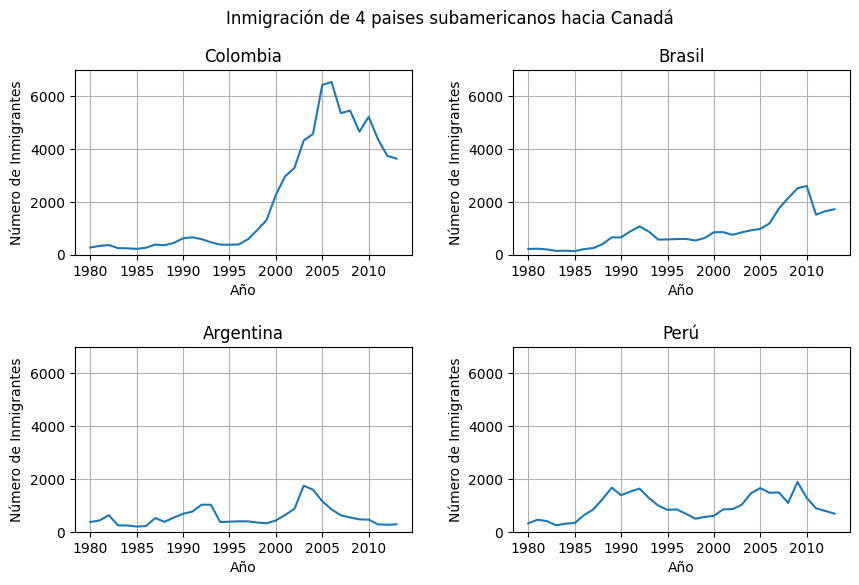

In [ ]:
# Hacer 4 subgráficos

fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Inmigración de 4 paises subamericanos hacia Canadá')

axs[0,0].plot(df.loc['Colombia', anos])
axs[0,0].set_title('Colombia')

axs[0,1].plot(df.loc['Brasil', anos])
axs[0,1].set_title('Brasil')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Perú', anos])
axs[1,1].set_title('Perú')

# debemos poner las gráficas a la misma escala
ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set(ylim=(ymin,ymax))

# Puedo iterar en cada una de las gráficas
for ax in axs.flat:
  ax.set(xlabel='Año', ylabel='Número de Inmigrantes')
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.grid()

plt.show()

In [ ]:
tiendas = ['A', 'B', 'C', 'D']
ventas_2022 = {'Ene': [100, 80, 150, 50],
    'Feb': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'May': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Sep': [240, 160, 290, 130],
    'Oct': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dec': [300, 350, 400, 250]}

In [ ]:
# Para crear un DataFrame con estos datos, utilizando la columna "tiendas" como índice

data = pd.DataFrame(ventas_2022, index=tiendas)
data

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dec
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


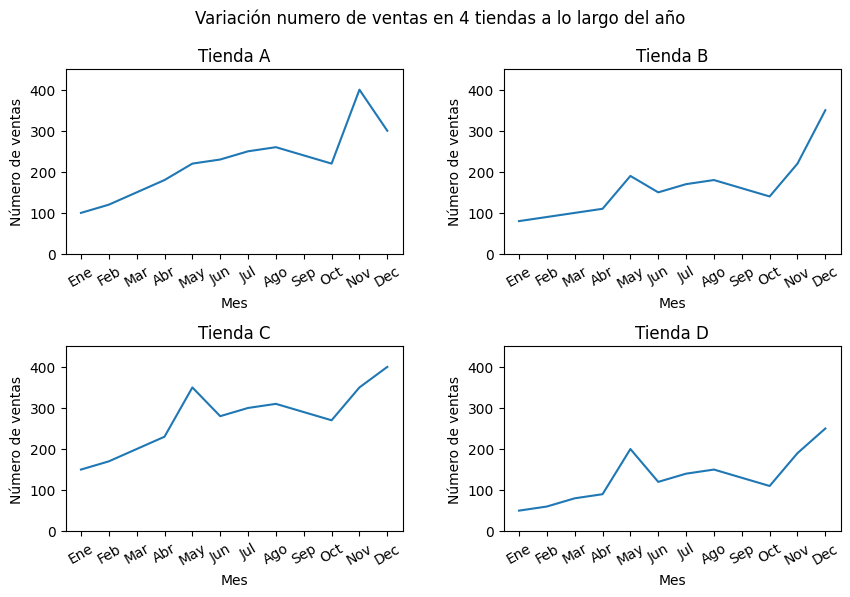

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Variación numero de ventas en 4 tiendas a lo largo del año')

# utilizar la propiedad loc de la biblioteca Pandas para trazar cada una de las tiendas.
axs[0,0].plot(data.loc['A'])
axs[0,0].set_title('Tienda A')

axs[0,1].plot(data.loc['B'])
axs[0,1].set_title('Tienda B')

axs[1,0].plot(data.loc['C'])
axs[1,0].set_title('Tienda C')

axs[1,1].plot(data.loc['D'])
axs[1,1].set_title('Tienda D')

ymin = 0
ymax = 450


for ax in axs.ravel():
  ax.set(ylim=(ymin,ymax))

for ax in axs.flat:
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de ventas')
    ax.tick_params(axis='x', rotation=30)

plt.show()

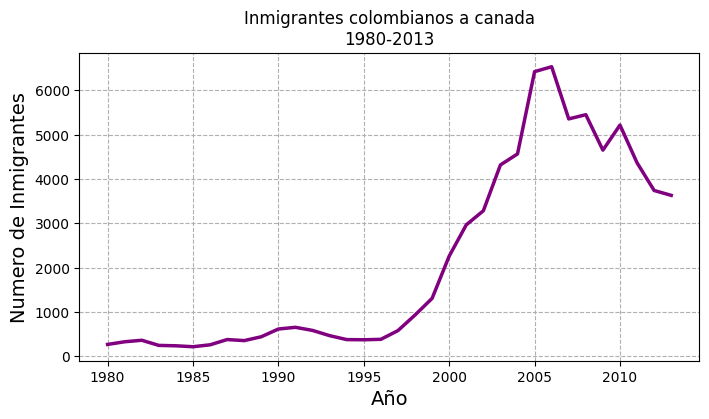

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'], lw=2.5, color='purple')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigrantes colombianos a canada\n1980-2013')
ax.set_xlabel('Año',fontsize=14)
ax.set_ylabel('Numero de Inmigrantes',fontsize=14)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.grid(linestyle='--')
plt.show()

In [ ]:
sudamerica = df.query('Region == "América del Sur"')
sudamerica.head(10)

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


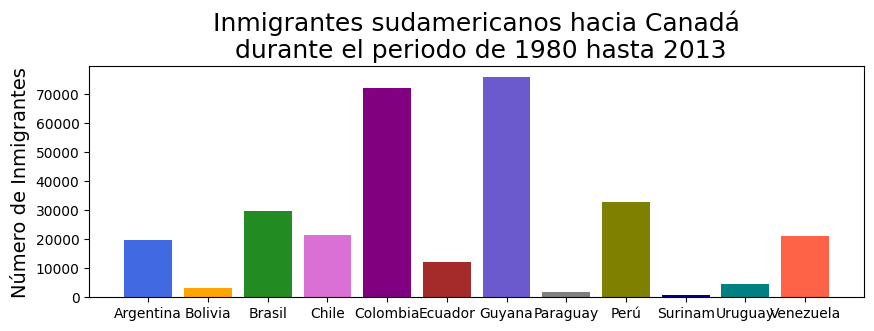

In [ ]:
colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,3))

ax.bar(sudamerica.index, sudamerica['Total'], color=colores)
ax.set_title('Inmigrantes sudamericanos hacia Canadá\n durante el periodo de 1980 hasta 2013', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.show()

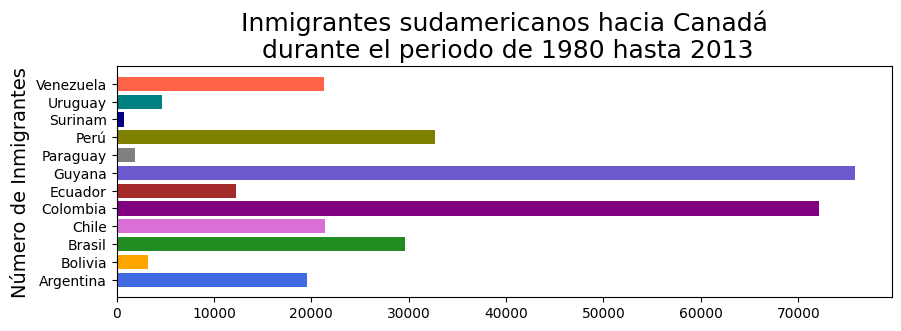

In [ ]:
colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,3))

ax.barh(sudamerica.index, sudamerica['Total'], color=colores)
ax.set_title('Inmigrantes sudamericanos hacia Canadá\n durante el periodo de 1980 hasta 2013', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.show()

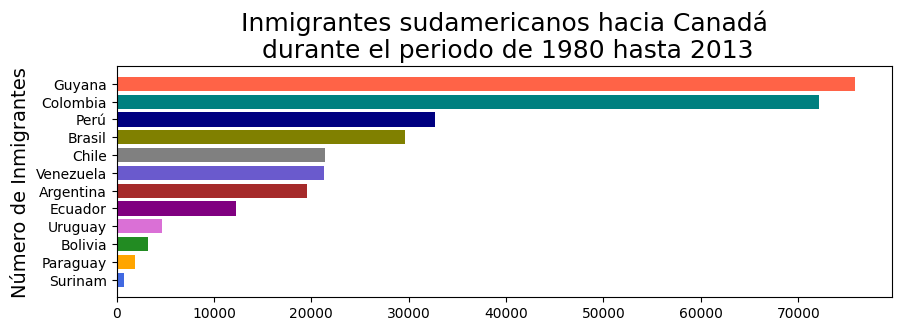

In [ ]:
#creando esta variable me permite ordenar el grafico de forma ascendente
sudamerica_sorted = sudamerica.sort_values('Total',ascending=True)

colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,3))

ax.barh(sudamerica_sorted.index, sudamerica_sorted['Total'], color=colores)
ax.set_title('Inmigrantes sudamericanos hacia Canadá\n durante el periodo de 1980 hasta 2013', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.show()

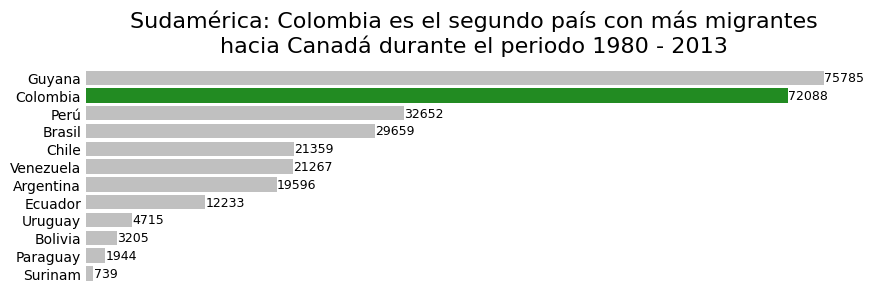

In [ ]:
# creamos una gráfica que resalte un resultado en este caso Colombia

colores =[]
for pais in sudamerica_sorted.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, ax = plt.subplots(figsize=(10,3))

# para quitar el recuadro de la gráfica
ax.set_frame_on(False)
# para eliminar el eje X
ax.xaxis.set_visible(False)
# para quitar las lineas que iban con los paises
ax.tick_params(axis='y',which='both',size=0)

ax.barh(sudamerica_sorted.index, sudamerica_sorted['Total'],color=colores)
ax.set_title('Sudamérica: Colombia es el segundo país con más migrantes\nhacia Canadá durante el periodo 1980 - 2013',fontsize=16)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=10)
# ax.set_xlabel('Número de Inmigrantes', fontsize=13)
# ax.xaxis.set_tick_params(labelsize=12)

# para que las barras muestren la cantidad de inmigrantes de cada pais
for i,j in enumerate(sudamerica_sorted['Total']):
  ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')

fig.savefig('/content/inmigrantes_sudamericanos_canada.png',
            transparent=False,dpi=300,bbox_inches='tight')

plt.show()

# j es X y 20 son pixeles, j es Y

In [ ]:
# imprimir las opciones que hay para guardar la figura

print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


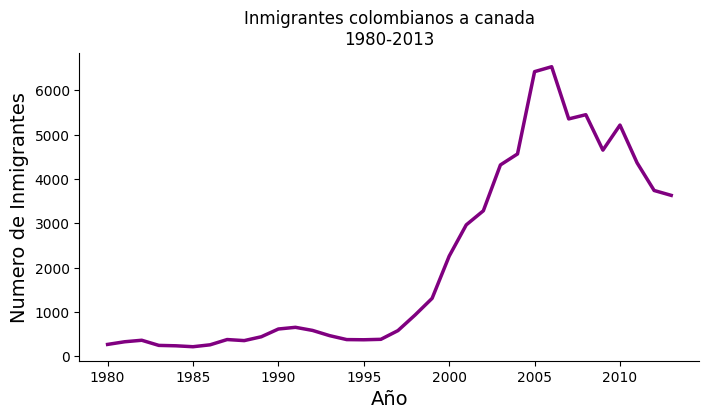

In [ ]:
# Guardar el gráfico de Colombia

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'], lw=2.5, color='purple')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigrantes colombianos a canada\n1980-2013')
ax.set_xlabel('Año',fontsize=14)
ax.set_ylabel('Numero de Inmigrantes',fontsize=14)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

# Quita las lineas que rodean el gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('/content/inmigrantes_colombia_canada.png',
            transparent=False,dpi=300,bbox_inches='tight')#definir el fondo, en este caso fondo blanco

            #dpi:resolución, bbox_inches= el margen, tight:significa apretado

plt.show()

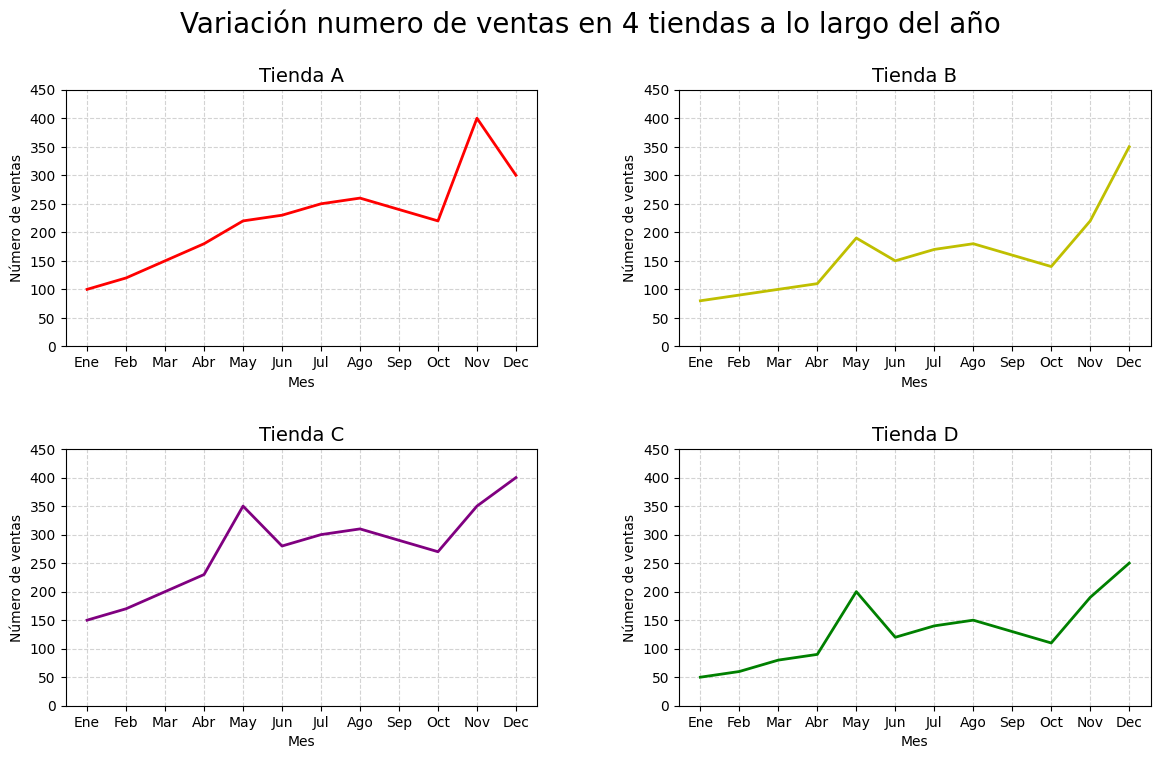

In [ ]:
# Modifica la figura de las tiendas

fig, axs = plt.subplots(2,2, figsize=(14,8))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
fig.suptitle('Variación numero de ventas en 4 tiendas a lo largo del año',fontsize=20)

# utilizar la propiedad loc de la biblioteca Pandas para trazar cada una de las tiendas.
axs[0,0].plot(data.loc['A'],lw=2,color='r')
axs[0,0].set_title('Tienda A',fontsize=14)

axs[0,1].plot(data.loc['B'],lw=2,color='y')
axs[0,1].set_title('Tienda B',fontsize=14)

axs[1,0].plot(data.loc['C'],lw=2,color='purple')
axs[1,0].set_title('Tienda C',fontsize=14)

axs[1,1].plot(data.loc['D'],lw=2,color='g')
axs[1,1].set_title('Tienda D',fontsize=14)

ymin = 0
ymax = 450


for ax in axs.ravel():
  ax.set(ylim=(ymin,ymax))

for ax in axs.flat:
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de ventas')
    ax.grid(color='lightgrey', linestyle='--')

plt.show()

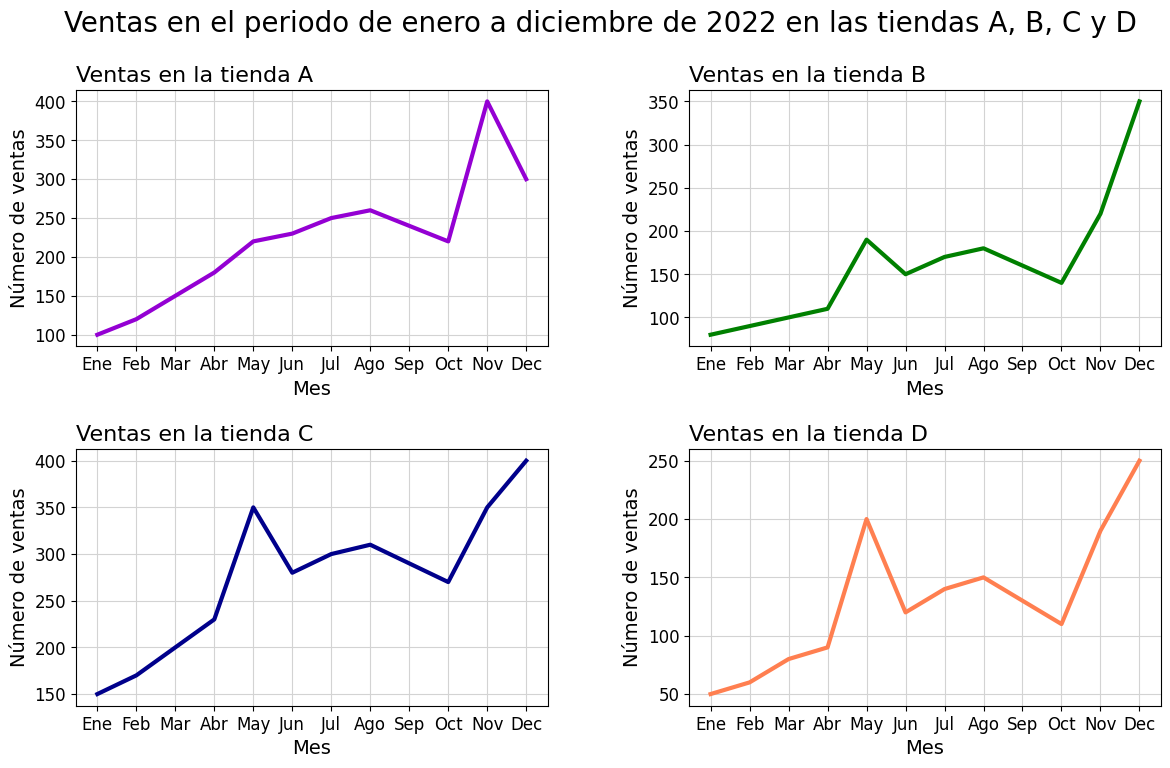

In [ ]:
# otra forma de modificar los gráficos

# Crear la figura y los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Ajustar los espaciados entre los subgráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Agregar un título general a los subgráficos
fig.suptitle('Ventas en el periodo de enero a diciembre de 2022 en las tiendas A, B, C y D', fontsize=20)

# Lista de colores
colores = ['darkviolet', 'green', 'darkblue', 'coral']

# Bucle para trazar y personalizar los subgráficos
for i, ax in enumerate(axs.flat):
    ax.plot(data.loc[data.index[i]], color=colores[i], lw=3)
    ax.set_title(f'Ventas en la tienda {data.index[i]}', loc='left', fontsize=16)
    ax.set_xlabel('Mes', fontsize=14)
    ax.set_ylabel('Número de ventas', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(color='lightgrey')

plt.show()

## Seaborn

In [ ]:
import seaborn as sns

In [ ]:
# vamos a configurar un tema para que todas las gráficas lo tengan

sns.set_theme()

In [ ]:
# ver los datos historicos de Canadá

top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


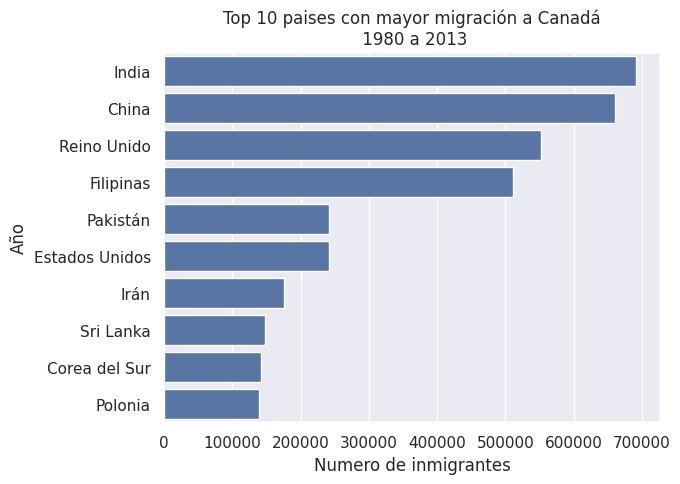

In [ ]:
ax = sns.barplot(data=top_10, x='Total', y=top_10.index)
ax.set(title='Top 10 paises con mayor migración a Canadá\n 1980 a 2013',
       xlabel='Numero de inmigrantes',
       ylabel='Año')
plt.show()

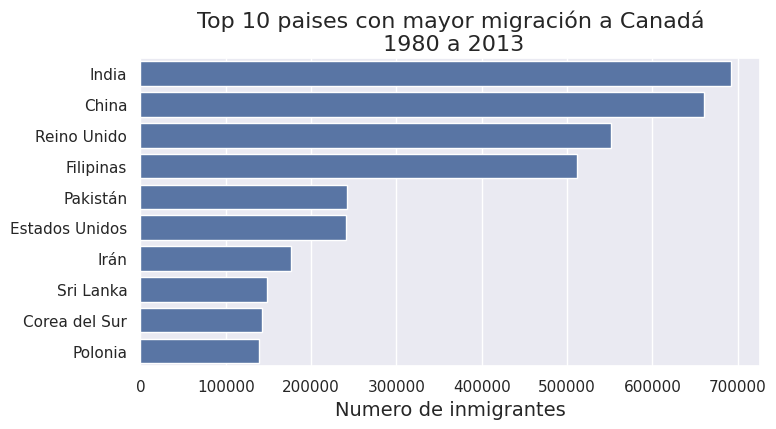

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=top_10, x='Total', y=top_10.index,orient='h')
ax.set_title('Top 10 paises con mayor migración a Canadá\n 1980 a 2013', fontsize=16)
ax.set_xlabel('Numero de inmigrantes', fontsize=14)
ax.set_ylabel('')

plt.show()

In [ ]:
# vamos a definir una función para probar varias paletas de colores

def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  # esto lo hacemos usando matplotlib, abajo se muestra como es con seaborn
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.tick_params(axis='y',which='both',size=0)
  ax = sns.barplot(data=top_10, x='Total', y=top_10.index,hue=top_10.index,orient='h',palette=palette)
  ax.set_title('Top 10 paises con mayor migración a Canadá\n 1980 a 2013', fontsize=16)
  ax.set_xlabel('Numero de inmigrantes', fontsize=14)
  ax.set_ylabel('')
  for i,j in enumerate(top_10['Total']):
   ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')

  plt.show()

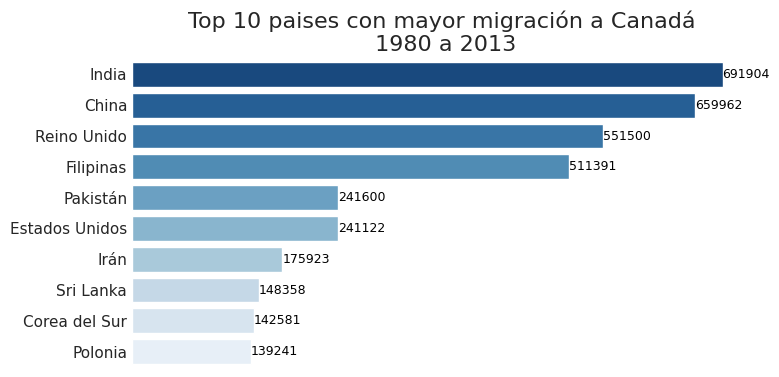

In [ ]:
generar_grafico('Blues_r')

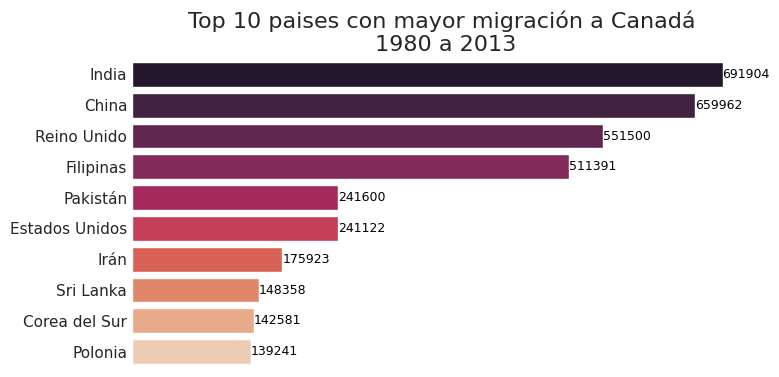

In [ ]:
generar_grafico('rocket')

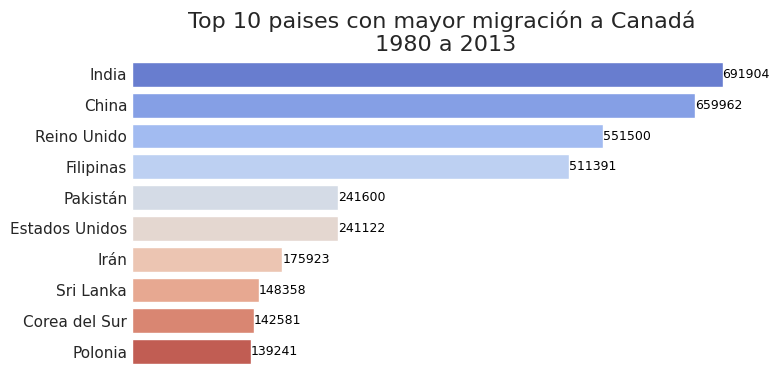

In [ ]:
generar_grafico('coolwarm')

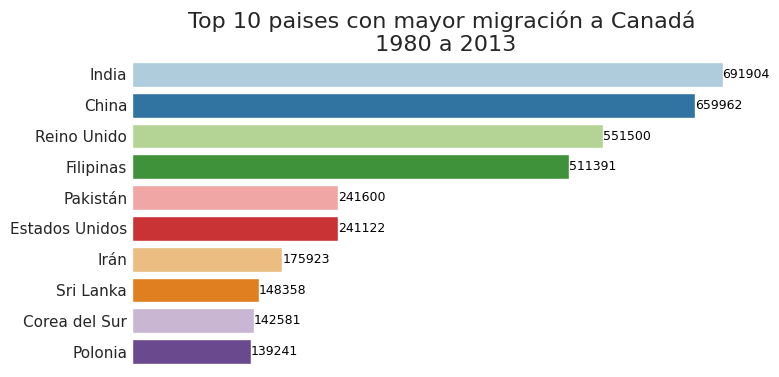

In [ ]:
generar_grafico('Paired')

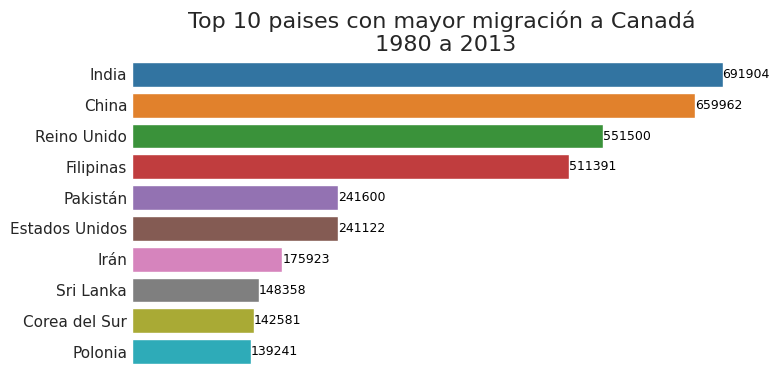

In [ ]:
generar_grafico('tab10')

In [ ]:
# Así se elimina el fondo y las lineas con seaborn

def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.set(xticklabels=[])
  ax = sns.barplot(data=top_10, x='Total', y=top_10.index,hue=top_10.index,orient='h',palette=palette)
  ax.set_title('Top 10 paises con mayor migración a Canadá\n 1980 a 2013', fontsize=16)
  ax.set_xlabel('Numero de inmigrantes', fontsize=14)
  ax.set_ylabel('')
  # quita el recuadro
  sns.despine()
  for i,j in enumerate(top_10['Total']):
   ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')

  plt.show()

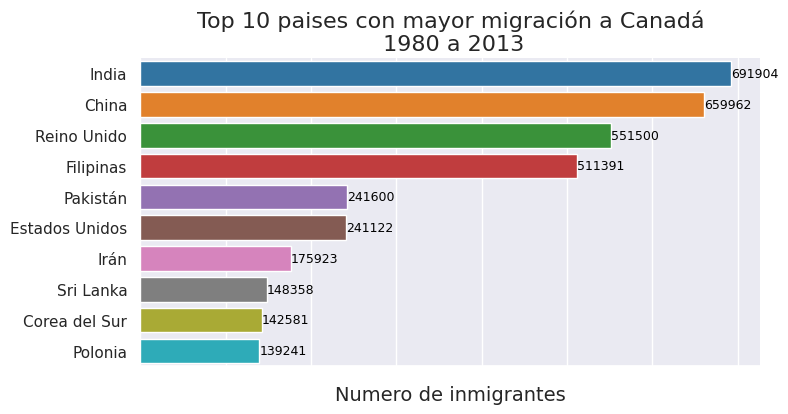

In [ ]:
generar_grafico('tab10')

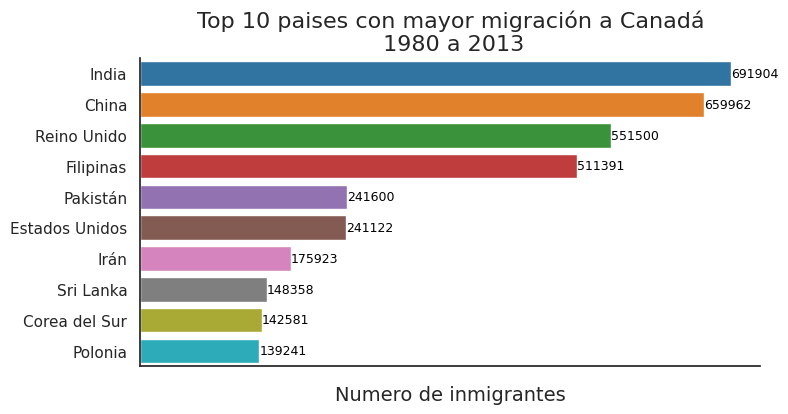

In [ ]:
sns.set_theme(style='white')
generar_grafico('tab10')

In [ ]:
top_4 = df.loc[['Colombia', 'Argentina', 'Brasil', 'Perú']]
top_4 = top_4.sort_values(by='Total', ascending=False)
top_4.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596


In [ ]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.set(xticklabels=[])
  ax = sns.barplot(data=top_4, x='Total', y=top_4.index,hue=top_4.index,orient='h',palette=palette)
  ax.set_title('Top 4 paises sudamericanos con mayor migración a Canadá\n 1980 a 2013', fontsize=16)
  ax.set_xlabel('Numero de inmigrantes', fontsize=14)
  ax.set_ylabel('')
  # quita el recuadro
  sns.despine()
  for i,j in enumerate(top_4['Total']):
   ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')

  plt.show()

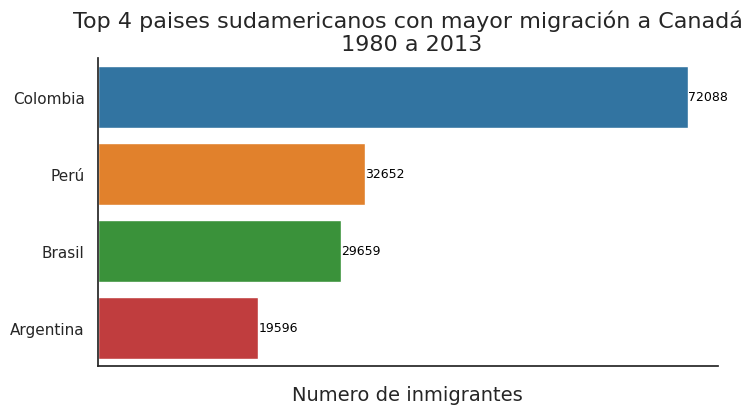

In [ ]:
sns.set_theme(style='white')
generar_grafico('tab10')

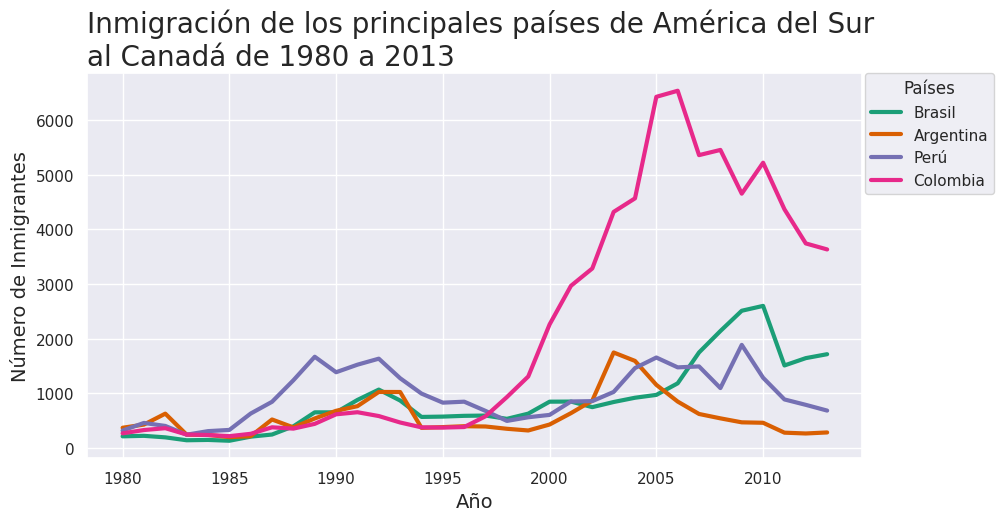

In [ ]:
# otra forma de hacerlo

sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(df.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(df.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(df.loc['Perú', anos], label='Perú', lw=3)
ax = sns.lineplot(df.loc['Colombia', anos], label='Colombia', lw=3)

ax.set_title('Inmigración de los principales países de América del Sur\nal Canadá de 1980 a 2013', loc='left', fontsize=20)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18, 1.02))

plt.show()

## Plotly

In [ ]:
# permite hacer gráficos interactivos

import plotly.express as px

In [ ]:
fig = px.line(datos_col, x='Año', y='Inmigrantes', title='Inmigrantes colombianos a Canadá entre 1980 y 2013')
fig.update_traces(line_color='green', line_width=3)
fig.update_layout(width=900,height=500, xaxis={'tickangle':-45}, xaxis_title='Año', yaxis_title='Número de inmigrantes',
                  font_family='Arial', font_size=14, font_color='grey')
fig.show()

In [ ]:
sudamerica.drop(['Continente', 'Region', 'Total'], axis=1, inplace=True)
sudamerica

<ipython-input-69-387b35c07088>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Bolivia,44,52,42,49,38,44,79,165,63,68,...,85,134,139,107,143,214,180,86,83,107
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273
Colombia,266,326,360,244,235,214,257,376,352,439,...,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631
Ecuador,238,207,184,155,179,208,240,344,265,278,...,417,491,525,419,437,373,353,348,282,418
Guyana,2334,2943,3575,2650,1932,2299,3942,6174,2977,3270,...,1341,1215,1286,1277,1137,1180,953,804,676,656
Paraguay,45,26,32,40,48,36,34,72,53,48,...,74,75,88,98,95,88,89,83,55,66
Perú,317,456,401,241,306,328,628,843,1237,1667,...,1460,1653,1473,1490,1094,1884,1283,886,787,682


In [ ]:
# hacemos transposición

sudamerica = sudamerica.T
sudamerica

Pais,Argentina,Bolivia,Brasil,Chile,Colombia,Ecuador,Guyana,Paraguay,Perú,Surinam,Uruguay,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142
1985,196,44,130,533,214,208,2299,36,328,16,92,165
1986,213,79,205,633,257,240,3942,34,628,7,137,179
1987,519,165,244,1454,376,344,6174,72,843,46,269,229
1988,374,63,394,990,352,265,2977,53,1237,16,99,279
1989,538,68,650,1023,439,278,3270,48,1667,24,144,304


In [ ]:
fig = px.line(sudamerica, x=sudamerica.index, y=sudamerica.columns, title='Inmigrantes sudamericanos a Canadá entre 1980 y 2013',
              color='Pais', markers=True)
fig.update_layout(width=900,height=500, xaxis={'tickangle':-45}, xaxis_title='Año', yaxis_title='Número de inmigrantes',
                  font_family='Arial', font_size=14, font_color='grey')

# estas gráficas se deben esxportar a archivos HTML
fig.write_html('inmigrantes_sudamericanos_canada.html')
fig.show()

## Cómo hacer un botón Play

In [ ]:
datos_col['Año'] = datos_col['Año'].astype(int)

In [ ]:
import plotly.graph_objs as go

In [ ]:
#A continuación, se crea una figura vacía usando la función go.Figure() y se asigna a la variable fig.
fig = go.Figure()

In [ ]:
#Para que el gráfico se muestre sin línea antes de hacer clic en el botón de reproducción, usamos iloc[0] en ambas variables

fig.add_trace(
    go.Scatter(x=[datos_col['Año'].iloc[0]], y=[datos_col['Inmigrantes'].iloc[0]], mode='lines', name='Inmigrantes', line=dict(width=4))
)

In [ ]:
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Colombianos hacia Canadá en el periodo de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Año</b>'),
    yaxis=dict(range=[0, 7000], autorange=False, title='<b>Número de Inmigrantes</b>'),
)

In [ ]:


# agregar un boton play
updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
)],

In [ ]:
frames = [go.Frame(data=[go.Scatter(x=datos_col['Año'].iloc[:i+1], y=datos_col['Inmigrantes'].iloc[:i+1])]) for i in range(len(datos_col))]
fig.frames = frames

In [ ]:
import plotly.graph_objs as go

# Creando una figura
fig = go.Figure()

# Adicionando a linha do gráfico e definindo a espessura da linha
fig.add_trace(
    go.Scatter(x=[datos_col['Año'].iloc[0]], y=[datos_col['Inmigrantes'].iloc[0]], mode='lines', name='Inmigrantes', line=dict(width=4))
)

# Definir la configuración del layout
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Colombianos hacia Canadá en el periodo de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Año</b>'),
    yaxis=dict(range=[0, 7000], autorange=False, title='<b>Número de Inmigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000,
    height=500
)

# Definir la configuración de la animación
frames = [go.Frame(data=[go.Scatter(x=datos_col['Año'].iloc[:i+1], y=datos_col['Inmigrantes'].iloc[:i+1])]) for i in range(len(datos_col))]
fig.frames = frames

# Mostrar la figura
fig.show()

## Gráfico interactivo Argentina vs Brasil

In [ ]:
df_comparacion = df.loc[['Brasil', 'Argentina'], anos]
df_comparacion = df_comparacion.T

In [ ]:
import plotly.graph_objs as go

# Creando una figura
fig = go.Figure()

# Adicionando las lineas de gráfico para Argentina y Brasil y definiendo la espessura de la linha
# Usamos el index para el eje x (años) y los nombres de las columnas ('Argentina', 'Brasil') para el eje y (inmigrantes)

fig.add_trace(
    go.Scatter(x=[df_comparacion.index[0]], y=[df_comparacion['Argentina'].iloc[0]], mode='lines', name='Argentina', line=dict(width=4))
)
fig.add_trace(
    go.Scatter(x=[df_comparacion.index[0]], y=[df_comparacion['Brasil'].iloc[0]], mode='lines', name='Brasil', line=dict(width=4))
)


# Definir la configuración del layout
fig.update_layout(
    # Actualizar el título para reflejar los datos correctos
    title=dict(
        text='<b>Inmigración de Argentina y Brasil hacia Canadá en el periodo de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    # El rango del eje x debería usar los años del índice
    xaxis=dict(range=[int(df_comparacion.index.min()), int(df_comparacion.index.max())], autorange=False, title='<b>Año</b>'),
    # Mantener el rango del eje y o ajustarlo según los datos
    yaxis=dict(range=[0, 7000], autorange=False, title='<b>Número de Inmigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000,
    height=500
)

# Definir la configuración de la animación
# Cada frame añade los datos de Argentina y Brasil hasta el año actual de la iteración
frames = [go.Frame(data=[go.Scatter(x=df_comparacion.index[:i+1], y=df_comparacion['Argentina'].iloc[:i+1]),
                         go.Scatter(x=df_comparacion.index[:i+1], y=df_comparacion['Brasil'].iloc[:i+1])]) for i in range(len(df_comparacion))]
fig.frames = frames

# Mostrar la figura
fig.show()

In [ ]:
bra_dict = {'Año':brasil.index.tolist(),
            'Inmigrantes':brasil.values.tolist()}
bra_dict

datos_brasil = pd.DataFrame(bra_dict)

In [ ]:
arg_dict = {'Año':argentina.index.tolist(),
            'Inmigrantes':argentina.values.tolist()}
arg_dict

datos_argentina = pd.DataFrame(arg_dict)

In [ ]:
import plotly.graph_objs as go

# Creando una figura
fig = go.Figure()

# Agregando la línea con los datos de Brasil
fig.add_trace(
    go.Scatter(x=[datos_brasil['Año'].iloc[0]], y=[datos_brasil['Inmigrantes'].iloc[0]], mode='lines', name='Inmigrantes de Brasil', line=dict(width=4))
)

# Agregando la línea con los datos de Argentina
fig.add_trace(
    go.Scatter(x=[datos_argentina['Año'].iloc[0]], y=[datos_argentina['Inmigrantes'].iloc[0]], mode='lines', name='Inmigrantes de Argentina', line=dict(width=4))
)

# Definiendo las configuraciones de diseño
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Brasil y Argentina a Canadá en el período de 1980 a 2013</b>',
        x=0.1,
        font=dict(size=18)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Año</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de inmigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1200, # Ancho de la figura en píxeles
    height=600 # Altura de la figura en píxeles
)

# Definiendo las configuraciones de animación
frames = []
for i in range(len(datos_brasil)):
    frame_data = [
        go.Scatter(x=datos_brasil['Año'].iloc[:i+1], y=datos_brasil['Inmigrantes'].iloc[:i+1]),
        go.Scatter(x=datos_argentina['Año'].iloc[:i+1], y=datos_argentina['Inmigrantes'].iloc[:i+1])
    ]
    frame = go.Frame(data=frame_data)
    frames.append(frame)
fig.frames = frames

# Mostrando la figura
fig.show()

In [ ]:
import plotly.graph_objs as go

# Crear figura
fig = go.Figure()

# Trazas iniciales: un solo punto para cada país
fig.add_trace(go.Scatter(
    x=[df_comparacion.index[0]],
    y=[df_comparacion['Argentina'].iloc[0]],
    mode='lines',
    name='Argentina',
    line=dict(width=4)
))

fig.add_trace(go.Scatter(
    x=[df_comparacion.index[0]],
    y=[df_comparacion['Brasil'].iloc[0]],
    mode='lines',
    name='Brasil',
    line=dict(width=4)
))

# Frames para animación
frames = []
for i in range(1, len(df_comparacion)):
    frames.append(go.Frame(
        data=[
            go.Scatter(
                x=df_comparacion.index[:i+1],
                y=df_comparacion['Argentina'].iloc[:i+1],
                mode='lines',
                name='Argentina',
                line=dict(width=4)
            ),
            go.Scatter(
                x=df_comparacion.index[:i+1],
                y=df_comparacion['Brasil'].iloc[:i+1],
                mode='lines',
                name='Brasil',
                line=dict(width=4)
            )
        ]
    ))

fig.frames = frames

# Layout
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Argentina y Brasil hacia Canadá en el periodo de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(
        range=[int(df_comparacion.index.min()), int(df_comparacion.index.max())],
        title='<b>Año</b>',
        autorange=False
    ),
    yaxis=dict(
        range=[0, 7000],
        title='<b>Número de Inmigrantes</b>',
        autorange=False
    ),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {
                'frame': {'duration': 100, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 0}
            }]
        )]
    )],
    width=1000,
    height=500
)

# Mostrar figura
fig.show()


In [ ]:
import plotly.graph_objs as go

# Crear figura
fig = go.Figure()

# Trazas iniciales (un solo punto)
fig.add_trace(go.Scatter(
    x=[datos_brasil['Año'].iloc[0]],
    y=[datos_brasil['Inmigrantes'].iloc[0]],
    mode='lines',
    name='Inmigrantes de Brasil',
    line=dict(width=4)
))

fig.add_trace(go.Scatter(
    x=[datos_argentina['Año'].iloc[0]],
    y=[datos_argentina['Inmigrantes'].iloc[0]],
    mode='lines',
    name='Inmigrantes de Argentina',
    line=dict(width=4)
))

# Layout
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Brasil y Argentina a Canadá en el período de 1980 a 2013</b>',
        x=0.1,
        font=dict(size=18)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Año</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de inmigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {
                'frame': {'duration': 100, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 0}
            }]
        )]
    )],
    width=1200,
    height=600
)

# Frames para animación
frames = []
for i in range(len(datos_brasil)):
    frames.append(go.Frame(
        data=[
            go.Scatter(
                x=datos_brasil['Año'].iloc[:i+1],
                y=datos_brasil['Inmigrantes'].iloc[:i+1],
                mode='lines',
                name='Inmigrantes de Brasil',
                line=dict(width=4)
            ),
            go.Scatter(
                x=datos_argentina['Año'].iloc[:i+1],
                y=datos_argentina['Inmigrantes'].iloc[:i+1],
                mode='lines',
                name='Inmigrantes de Argentina',
                line=dict(width=4)
            )
        ]
    ))

fig.frames = frames

# Mostrar figura
fig.show()
